The sech-sin filter

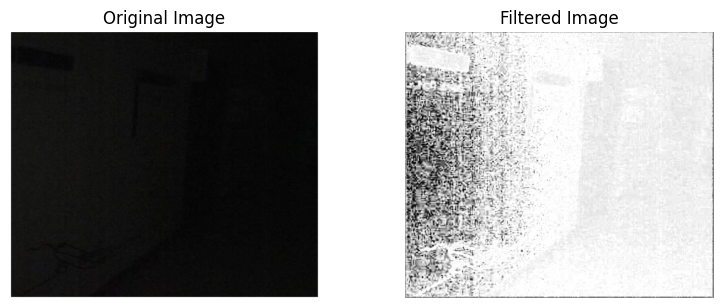

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def my_filter(img, a1, a2, a3):
    # Convert the image to grayscale if it's not already
    if len(img.shape) == 3:
        img = np.mean(img, axis=2)

    # Pad image to ensure even dimensions
    if img.shape[0] % 2 != 0:
        img = np.pad(img, ((0, 1), (0, 0)), mode='constant')
    if img.shape[1] % 2 != 0:
        img = np.pad(img, ((0, 0), (0, 1)), mode='constant')

    M1, M2 = img.shape
    S = M1 // 2

    # Step 1: Split the image into sub-signals
    Q1 = img[::2, :]
    Q2 = img[1::2, :]

    # Step 2: Column transformation
    high_freq_col = Q1 - Q2
    low_freq_col = Q2 + 0.5 * high_freq_col
    u_col = np.zeros((M1, M2))
    u_col[:S, :] = low_freq_col
    u_col[S:, :] = high_freq_col

    # Step 3: Row transformation with shape alignment
    Q1 = u_col[:, ::2]
    Q2 = u_col[:, 1::2]
    min_cols = min(Q1.shape[1], Q2.shape[1])
    Q1 = Q1[:, :min_cols]
    Q2 = Q2[:, :min_cols]

    high_freq_row = Q1 - Q2
    low_freq_row = Q2 + 0.5 * high_freq_row
    u_row = np.zeros((M1, M2))
    u_row[:, :min_cols] = low_freq_row
    u_row[:, min_cols:] = high_freq_row

    # Step 4: Signal reconstruction
    Q1 = u_row[:, min_cols:]
    Q2 = u_row[:, :min_cols]
    low_freq_row = Q2 - 0.5 * Q1
    high_freq_row = Q1 + low_freq_row
    u_row[:, 1::2] = low_freq_row
    u_row[:, ::2] = high_freq_row

    # Step 5: Column reconstruction
    Q1 = u_col[S:, :]
    Q2 = u_col[:S, :]
    low_freq_column = Q2 - 0.5 * Q1
    high_freq_col = Q1 + low_freq_column
    u_col[1::2, :] = low_freq_column
    u_col[::2, :] = high_freq_col

    # Step 6: Apply the final transformations
    t2 = a1 * u_col
    t3 = np.cosh(t2)
    t4 = t3 * a2
    t5 = np.sin(t4)
    q = a3 * t5

    return q

# Example usage
img = plt.imread('corner.jpg')  # Load your image here
filtered_img = my_filter(img, a1=0.1, a2=0.8, a3=1.5)

plt.figure(figsize=(12, 6))

plt.subplot(2, 3, 1)
plt.title("Original Image")
plt.axis('off')
plt.imshow(img, cmap='gray')

plt.subplot(2, 3, 2)
plt.title("Filtered Image")
plt.axis('off')
plt.imshow(filtered_img, cmap='gray')

plt.tight_layout()
plt.show()